# Comparing Machine Learning Methods
Classifying the Diabetes Dataset using four Classifiers : KNN, ANN-MLP, Decision Tree, and SVM
Dataset link : https://www.kaggle.com/johndasilva/diabetes
Medium Post : https://medium.com/@160shelf/comparing-machine-learning-algorithms-89a3b38d22a0?sk=83323bd927cc7eccafb305c65a934264

In [226]:
#Import Library
import pandas as pd
import numpy as np
#Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
#Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#Performance
from sklearn.metrics import accuracy_score

# Read data using Pandas

In [148]:
path = 'diabetes.csv'
df = pd.read_csv(path)

# Data preview


In [264]:
print("*******"*20)
print('Data Head')
print(data.head(5))
print("*******"*20)
print('Data shape:', data.shape)
print("*******"*20)
print('Class Distribution')
class_values_distribution = data.iloc[:,8].value_counts()
print(class_values_distribution)
print("*******"*20)
print('Features Correlation over Outcome')
dfCorr = data.corr()
cor_target = dfCorr['Outcome']
print(cor_target.sort_values(ascending=False))
print("*******"*20)
print('NaN Values')
data_null = data.isnull().sum()
print(data_null)

********************************************************************************************************************************************
Data Head
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  
********************************************************************************************************************************************
Data shape:

# Data Preprocessing

In [281]:
#Splitting Features and Class
X = df.drop(columns=['Outcome']) #<<Training Data
y = df['Outcome'].values #<<Kelas
#Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
print('Class Distribution')
print(sorted(Counter(y_train).items()))

# Oversampling
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('Class Distribution after Oversampling')
print(sorted(Counter(y_train).items()))

# Saving the Train and Test Dataset without Standard Scaler
X_t = X_train
y_t = y_train
X_t2 = X_test
y_t2 = y_test

#Normalizing the data with Standard Scaler
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

Class Distribution
[(0, 1063), (1, 537)]
Class Distribution after Oversampling
[(0, 1063), (1, 1063)]


# KNN Classifier

In [279]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
acc=accuracy_score(y_test,target_pred)
print('Accuracy : ',acc)

Accuracy :  0.91


In [287]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
acc=accuracy_score(y_test,target_pred)
print('Accuracy : ',acc)

Accuracy :  0.9075


# ANN- MLP Classifier

In [235]:
model = MLPClassifier(max_iter = 1000)
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
acc=(accuracy_score(y_test,target_pred))
print('Accuracy : ',acc)

0.94


C:\Users\ranifarinda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ANN - MLP Classifier without Standard Scaler

In [284]:
model = MLPClassifier(max_iter = 1000)
model.fit(X_t, y_t)
target_pred = model.predict(X_t2)
acc=(accuracy_score(y_t2,target_pred))
print('Accuracy : ',acc)

Accuracy :  0.71


# Decision Tree Classifier

In [258]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
acc=accuracy_score(y_test,target_pred)
print('Accuracy : ',acc)

0.97

# Decision Tree without Standard Scaler

In [286]:
model = DecisionTreeClassifier()
model.fit(X_t, y_t)
target_pred = model.predict(X_t2)
acc=(accuracy_score(y_t2,target_pred))
print('Accuracy : ',acc)

Accuracy :  0.98


# SVM Classifier

In [257]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
acc=(accuracy_score(y_test,target_pred))
print('Accuracy : ',acc)

0.8425


# SVM Classifier without Standard Scaler Normalization

In [282]:
model = SVC(gamma='auto')
model.fit(X_t, y_t)
target_pred = model.predict(X_t2)
acc=(accuracy_score(y_t2,target_pred))
print('Accuracy : ',acc)

Accuracy :  0.975


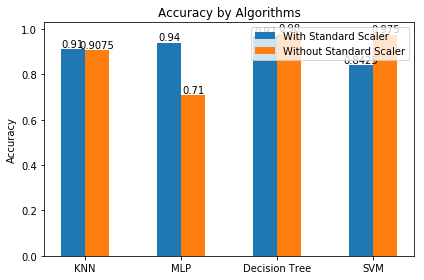

In [302]:
# Visualization
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['KNN', 'MLP', 'Decision Tree', 'SVM']
ss = [0.91, 0.94, 0.97, 0.8425]
no_ss = [0.9075, 0.71, 0.98, 0.975]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ss, width, label='With Standard Scaler')
rects2 = ax.bar(x + width/2, no_ss, width, label='Without Standard Scaler')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()